# Notebook 3:  Redes de Kohonen y SOM (Self organized maps)
En este notebook vamos a implementar el algoritmo de clustering SOM en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Recuerde instala previamente el paquete kohonen en R.



In [5]:
#SOM example using wines data set
library(kohonen)

set.seed(7)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
datos <- as.data.frame(datos)
summary(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

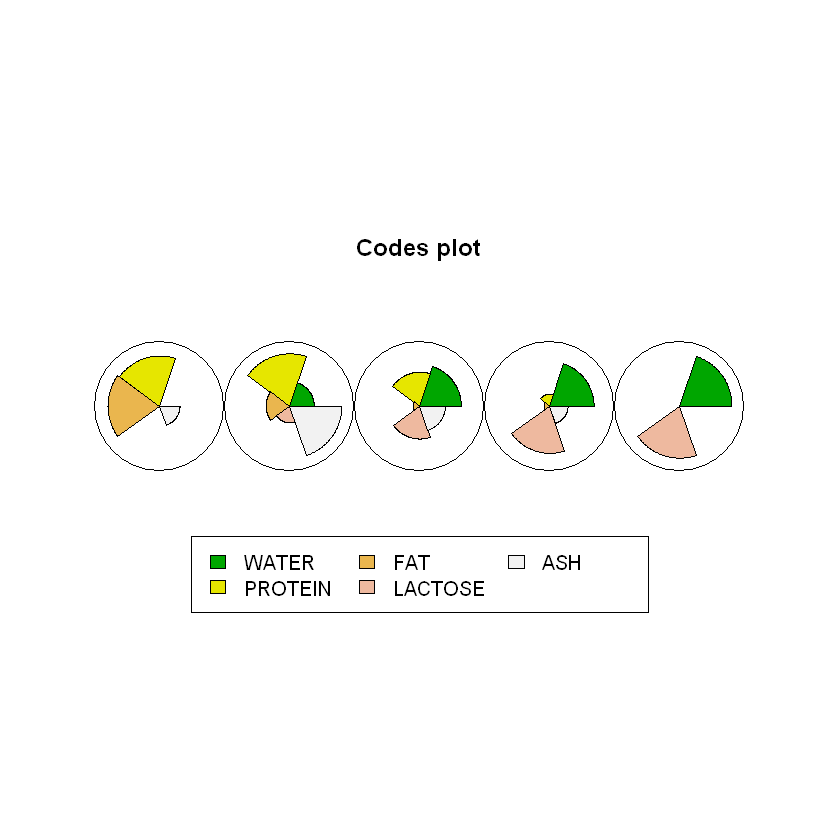

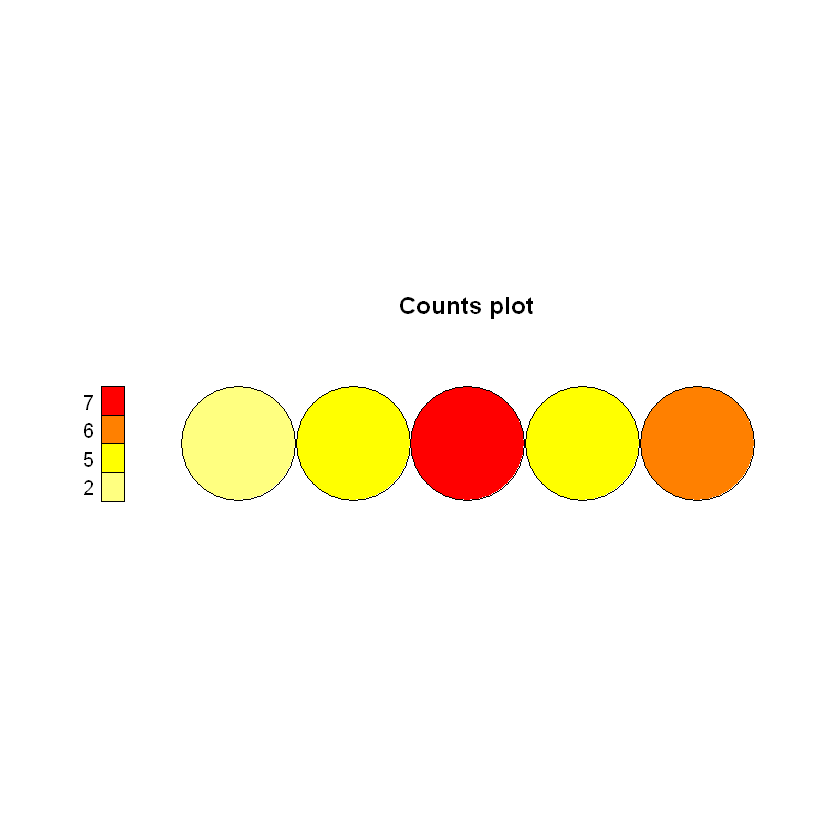

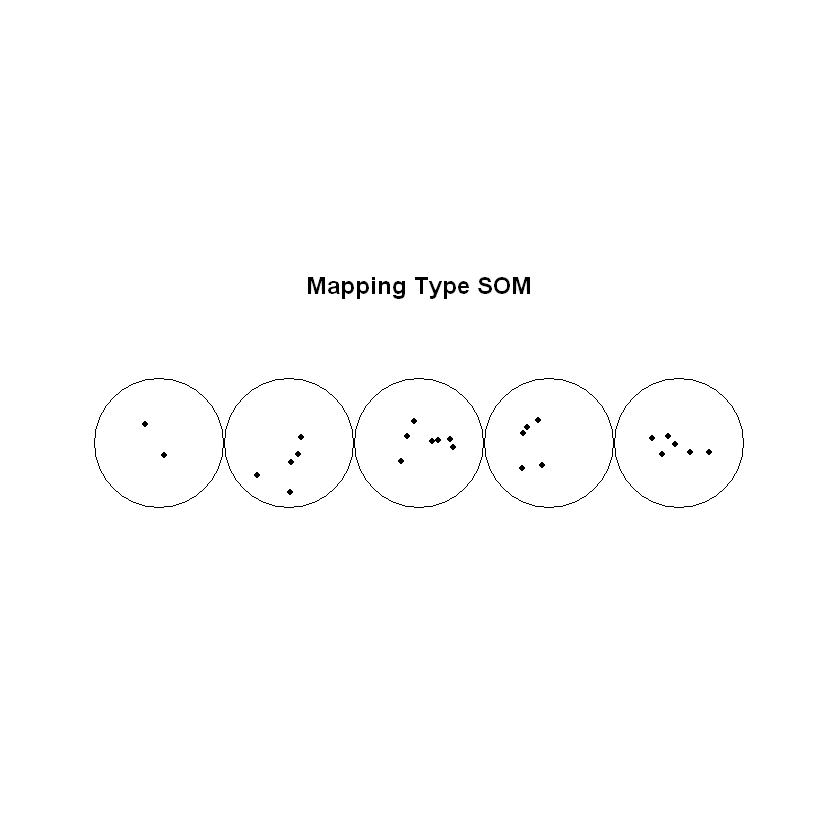

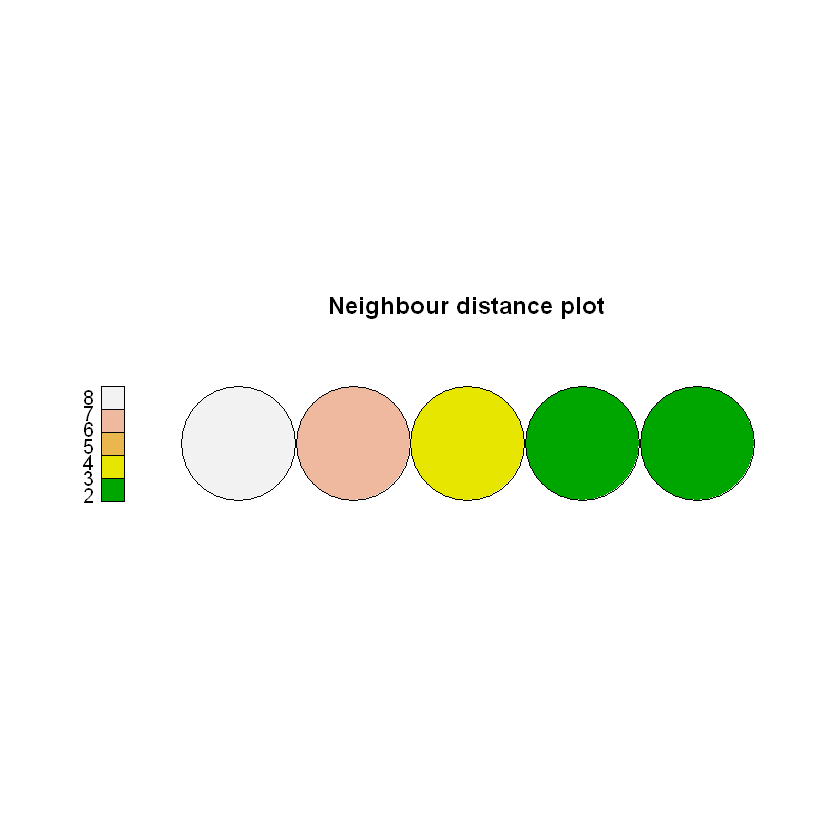

In [6]:
#create SOM grid
sommap <- som(scale(datos), grid = somgrid(5, 1, "rectangular"))
plot(sommap,type="codes",codeRendering = "segments")

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)


Ejercicio 1: 
* a) **Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.**

    * Som es un tipo de red neuronal, la cual gradualmente va generando grupo, mediantes movimientos y acciones involuntarias como girar y doblar. El resultado de esto es un grupo en una dimension inferior.
    
    * **Párametros en entrada:** Recibe un dataset donde las filas son un objeto distinto, y las columnas son los atributos de los objetos. Otro parametro es una grilla (somgrid) que permite plotear los resultados del SOM. Otro parametro es rlen (vece que el conjunto de datos se representara en la red). Radius representa el radio de la vecindad.
    
    * **Párametro de salida:** Son los graficos
    
    * **Gráficos obtenidos:** El primer grafico muestra las iteraciones de como las neuronas forman los grupos. El segundo grafico muestra la densidad del grupo. El tercer grafico muestra las distancias eucledianas entre grupos
    
* b) **Modifique parámetros de entrada. Interprete y comente los resultados obtenidos.** 
    Si se modifica el parametro somgri de hexagonal a recutangular, cambia la manera en que se asigna los grupos ya que no compara solo con los laterales, superior e inferior, si no que compara ademas con las esquinas. Se pede modificar la cantidad de grupos que queremos clasificar.

Warning message in matrix(sommap$codes[[1]], ncol = 3, nrow = 4, byrow = FALSE):
"la longitud de los datos [25] no es un submúltiplo o múltiplo del número de filas [4] en la matriz"

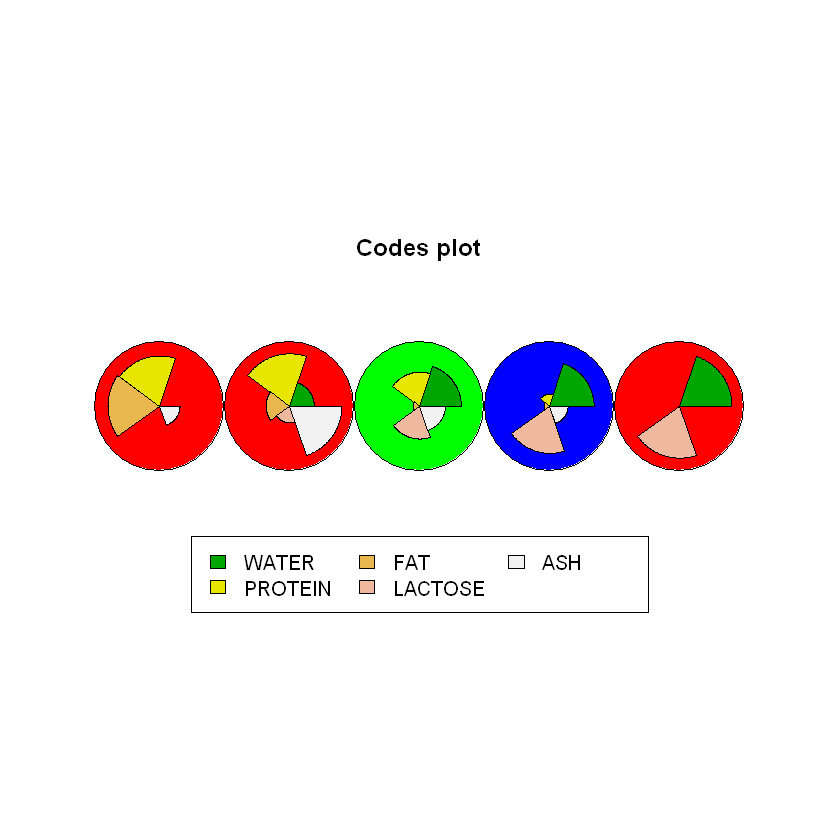

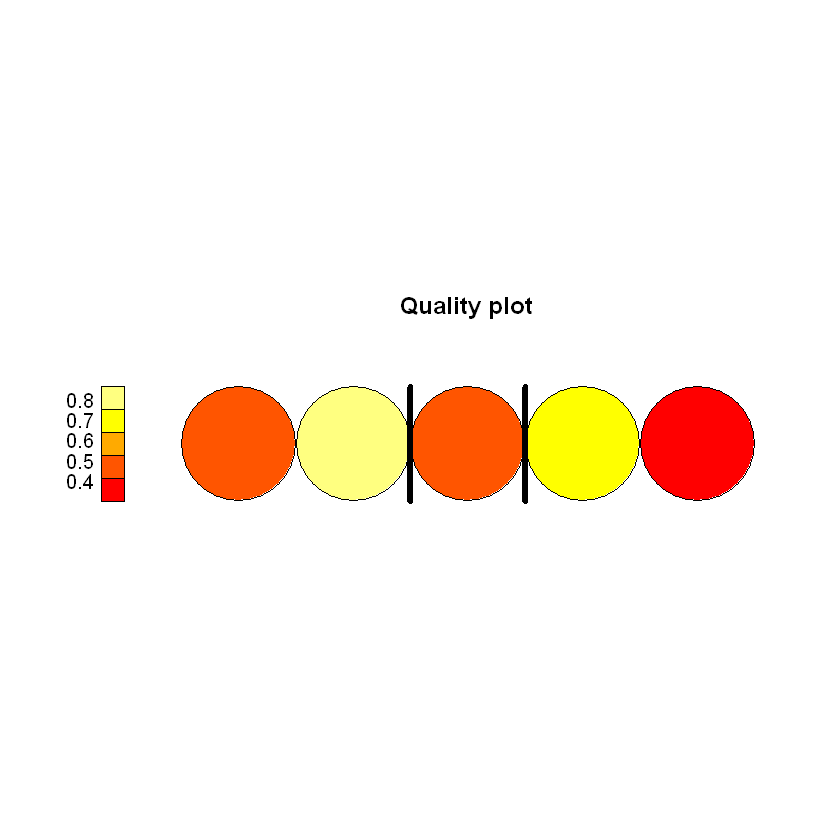

In [7]:
mat <- matrix(sommap$codes[[1]], ncol=3,nrow=4,byrow=FALSE)

## use hierarchical clustering to cluster the codebook vectors
groups<-3
som.hc <- cutree(hclust(dist(mat)), groups)

#plot
plot(sommap, type="codes", bgcol=rainbow(groups)[som.hc])
plot(sommap, type="quality", bgcol=rainbow(groups)[som.hc])

#cluster boundaries
add.cluster.boundaries(sommap, som.hc)


Ejercicio 2: 

* a) **Explique como funciona esta nueva visualización.**

    * Se usan las distancias entre los grupos, utilizando una agrupación jerarquica, una vez agrupados se muestra donde se agrupo con el comando *add.cluster.bondaries*, el cual nos muestra lineas en el grupo seleccionado
    
* b) **Interprete y comente los resultados obtenidos.**
    * Nos permite visualizar los atributos y los rangos de valores con lo que el modelo clasifica. 

Ejercicio 3: 

* a) **Proponga un nuevo conjunto de datos a los cuales aplicar este algoritmo. Justifique su elección**
    * El conjunto de datos que propongo es el de la NBA, ya que es un dataset donde se pueden agrupar los datos (jugadores) de distintas maneras, considerando distintas variables, además permite realizar un estudio de un dataset con varias dimensiones (columnas de datos) y llevarlo a algo más entendible en 2 dimensiones.

* b) **Realice las estimaciones y discuta sus resultados.**

In [15]:
data(wines)

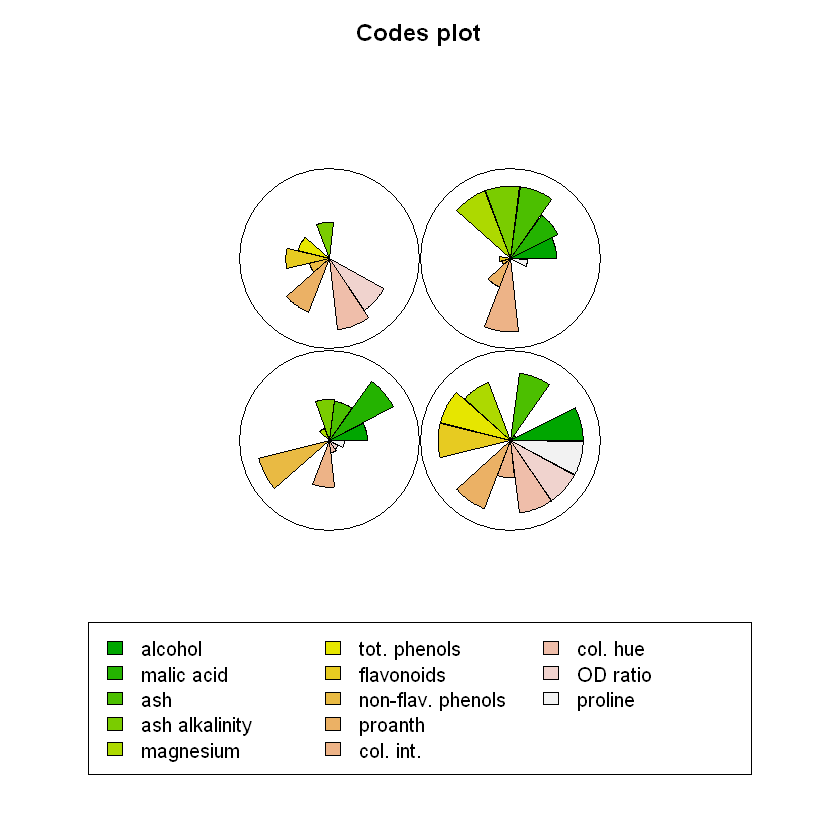

In [18]:
#Gasolina.measures1 <- c("FTA", "2PA", "3PA")
Vinos.SOM1 <- som(scale(wines), grid = somgrid(2, 2, "rectangular"))
plot(Vinos.SOM1)

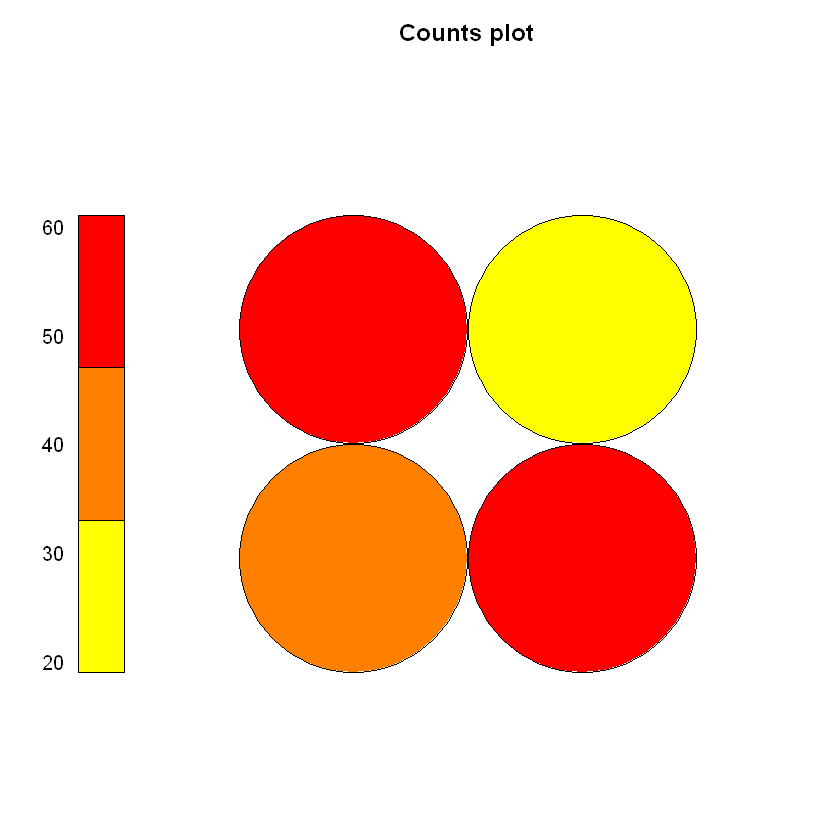

In [19]:
plot(Vinos.SOM1, type = "counts", palette.name = colors, heatkey = TRUE)

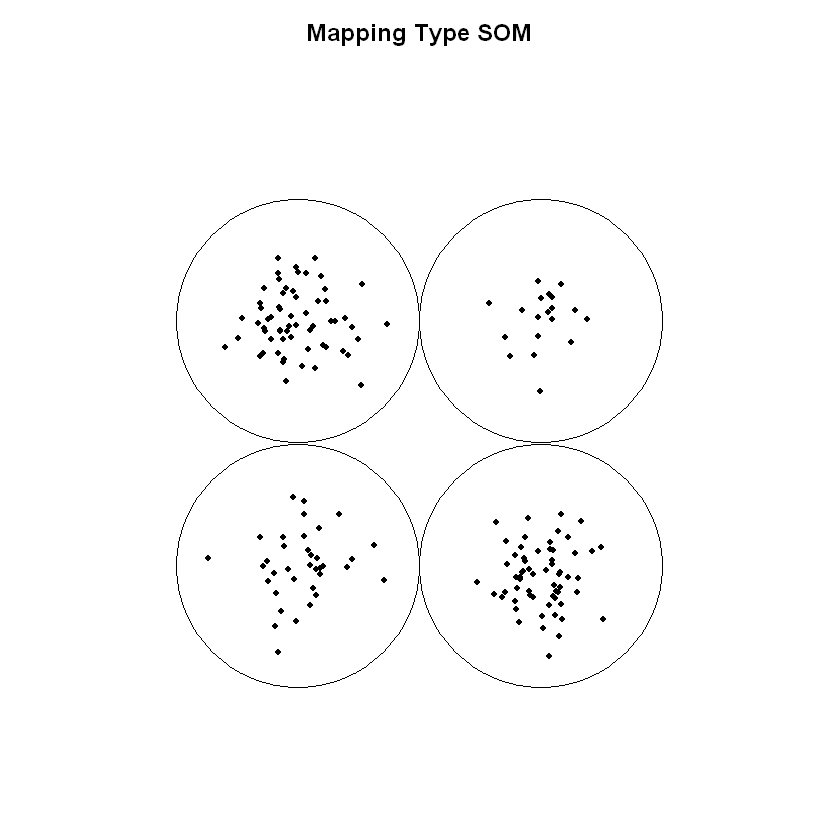

In [20]:
plot(Vinos.SOM1, type = "mapping", pchs = 20, main = "Mapping Type SOM")

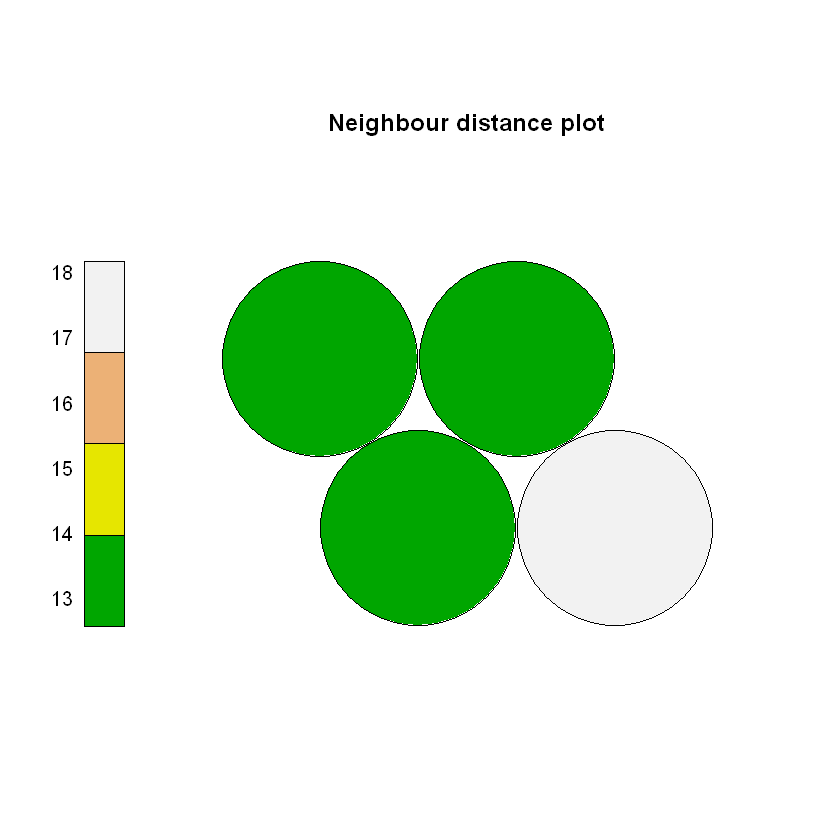

In [22]:
Vinos.SOM2 <- som(scale(wines), grid = somgrid(2, 2, "hexagonal"))
plot(Vinos.SOM2, type = "dist.neighbours", palette.name = terrain.colors)

* En el codes plot podemos ver como se forman los vectores representativos, en cambio, en el Mapping Type SOM vemos como los vinos se agrupan según lo cerca que estan sus estadisticas de los vectores representativos. Esto es util para agrupar los vinos con un valor de referencia